# Hydrology Domain Critical Risk Indicators (CRIs)

This Jupyter Notebook  is intended to accompany the publication "*Critical Risk Indicators (CRIs) for the electric power grid: A survey and discussion of interconnected effects*". The work presented in this notebook is part of [Predictive Risk Investigation SysteM (PRISM) for Multi-layer Dynamic Interconnection Analysis](https://sites.google.com/view/prism-prj). 

**Definition of CRIs:** We define CRIs as quantifiable information specifically associated with cumulative or acute risk exposure to devastating, ruinous losses resulting from a disastrous (cumulative) activity or a catastrophic event. We aim to identify critical risks and existing indicators in many domains, and develop new CRIs by harnessing the data revolution.

In this documents, we provide information in CRIs in Hydrology domain and present some tools on analyzing these CRIs. Contents of this documents are:
- Brief description of CRIs in Hydrology
- Available datasets
- Analysis of streamflow for California droughts
    - Flow duration curves (FDCs)


## Brief description of Hydrology CRIs

The hydrologic risk (i.e., hydrological drought) is quantified based on prolonged abnormally low streamflow and groundwater depletion. CRIs in hydrology are the drought indices that quantify the deviation in water availability (surface water or groundwater) compared to long-term historical normal. Existing CRIs in hydrology includes:

1. **Streamflow:** Streamflow level or discharge is a useful indicator for hydrologic risks (e.g., drought or flood) and is used to identify the drought conditions. The values of streamflow are converted in percentiles and are compared to historical observations during the same period of the year based on a threshold (e.g., 10th \%-ile of past decades distribution). 


2. **Drought indices:** Several drought indices have been developed over the years to identify droughts and to quantify the drought intensity/severity. [Palmer Drought Severity Index (PDSI)](https://climatedataguide.ucar.edu/climate-data/palmer-drought-severity-index-pdsi) and [Standardized Precipitation Index (SPI)](https://climatedataguide.ucar.edu/climate-data/standardized-precipitation-index-spi) are the most widely used drought indices. SPI is recommended by the World Meteorological Organization (WMP) and requires only monthly precipitation data. SPI is a meteorological drought index, but it can be computed for multiple timescales (e.g., 3, 6, 12, 24 months) that enables us to examine other types of droughts (agricultural or hydrological). PDSI uses readily available temperature and precipitation data to estimate relative dryness. It is a standardized index that generally spans -10 (dry) to +10 (wet).


3. **Groundwater:** Groundwater depletion rates provide information on excessive pumping activities for irrigation during the drought. The observations of groundwater wells can be used as a CRI that accounts for the change in groundwater table depth or the fraction of dry wells. 


## Hydrology Data

1. **Streamflow:** Daily streamflow observations are available for all major rivers in the US from the United States Geological Survey (USGS) [National Water Information System (NWIS)](https://waterdata.usgs.gov/nwis/rt). Additionally, [Geospatial Attributes of Gages for Evaluating Streamflow, version II (GAGES-II)](https://water.usgs.gov/GIS/metadata/usgswrd/XML/gagesII_Sept2011.xml) dataset provides a large set of geospatial data for 9322 gage sites across the US including environmental features (e.g. climate – including historical precipitation, geology, soils, topography) and anthropogenic influences (e.g. land use, road density, presence of dams, canals, or power plants). 


2. **Groundwater:** The USGS NWIS provides data on groundwater well observations for sites across US (https://waterdata.usgs.gov/nwis/gw). Additionally, different states also have networks of a large number of monitoring wells. For example, the Department of Water Resources, California provides groundwater data for thousands of wells in the state on the [Water Data Library (WDL)](http://wdl.water.ca.gov/). 

## Analysis of streamflow during California droughts

### Downloading the data

The streamflow data for different Gage stations in US is available on United States Geological Survey (USGS) [National Water Information System (NWIS)](https://waterdata.usgs.gov/nwis/rt). One can download these data manually from the website; however, there are some tools available to assist downloading data for a large number of stations. For example, we used [dataretrieval](https://github.com/USGS-python/dataretrieval) Python package  to retrieve data from the NWIS. The steps to install the package are provided on https://github.com/USGS-python/dataretrieval.

Services available from NWIS include:

- instantaneous values (iv)
- daily values (dv)
- statistics (stat)
- site info (site)
- discharge peaks (peaks)
- discharge measurements (measurements)
- water quality samples (qwdata)

In [1]:
# import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import scipy.stats as sp

# import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

Specifing start and end dates, and selecting sites. Site Ids for gages in US can be found on [NWIS](https://waterdata.usgs.gov/nwis/rt)


In [2]:
# start date
start = '1995-01-01'

# end date
end = '2019-12-31'

# date range
dateRange = pd.date_range(start, end, freq='1D')

# specify the USGS site codes for which we want data.
sites = ['11377100', '11389500', '11390500', '11523000']  # some random sites in CA

Downloading data using [dataretrieval](https://github.com/USGS-python/dataretrieval)

In [3]:
data = np.empty([len(dateRange), len(sites)])

for s in range(len(sites)):
    # get daily values (dv)
    df = nwis.get_record(sites=sites[s], service='dv', start=start, end=end)

    # display streamflow value
    df_streamflow = df['00060_Mean']
    data[:, s] = df_streamflow.values
    print('Downloaded Gage ' + sites[s])

df = pd.DataFrame(data=data,columns=sites,index=dateRange)
print('Downloaded data')
df

Downloaded Gage 11377100
Downloaded Gage 11389500
Downloaded Gage 11390500
Downloaded Gage 11523000
Downloaded data


,11377100,11389500,11390500,11523000
1995-01-01,5310.0,5670.0,7480.0,4010.0
1995-01-02,5200.0,5300.0,7040.0,3770.0
1995-01-03,5230.0,5120.0,6780.0,3620.0
1995-01-04,8580.0,6610.0,7140.0,3490.0
1995-01-05,8910.0,15000.0,12500.0,3660.0
...,...,...,...,...
2019-12-27,8440.0,9130.0,10000.0,3200.0
2019-12-28,8330.0,8820.0,9680.0,3040.0
2019-12-29,7940.0,8570.0,9360.0,3000.0
2019-12-30,7520.0,8340.0,9150.0,3020.0


Plotting daily streamflow

Text(0.5, 1.0, 'Daily streamflow time series')

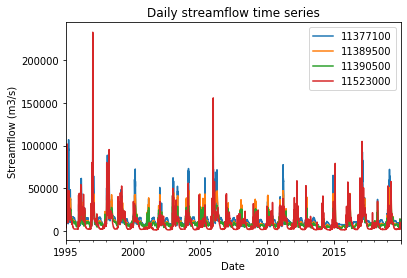

In [4]:
df.plot(kind='line')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Streamflow (m3/s)')
plt.title('Daily streamflow time series')

Plotting monthly streamflow

Text(0.5, 1.0, 'Monthly streamflow time series')

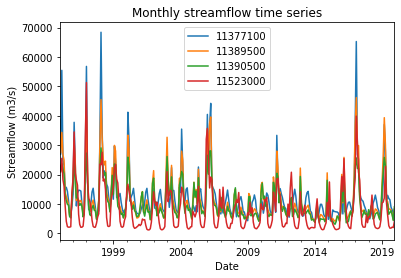

In [5]:
# Daily to monthly conversion
df_m = df.resample('M').mean()

df_m.plot(kind='line')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Streamflow (m3/s)')
plt.title('Monthly streamflow time series')


### Analyzing streamflow during drought events

Plotting normalized streamflow for two drought events in California:
1. 2007-2009 drought
2. 2011-2016 drought

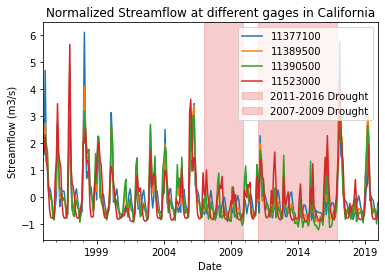

In [6]:
mdata = df_m.values
normData = np.empty(mdata.shape)
for i in range(mdata.shape[1]):
    normData[:,i]=(mdata[:,i]-np.mean(mdata[:,i]))/np.std(mdata[:,i])


df_norm = pd.DataFrame(data=normData,columns=sites,index=df_m.index)

df_norm.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Streamflow (m3/s)')
plt.axvspan(datetime(2011,1,1), datetime(2016,12,31),  label="2011-2016 Drought", color='#EF9A9A', alpha=0.5)
plt.axvspan(datetime(2007,1,1), datetime(2009,12,31),  label="2007-2009 Drought", color='#EF9A9A', alpha=0.5)
plt.title(label='Normalized Streamflow at different gages in California')
plt.legend()

### Analyzing the Flow Duration Curves (FDCs)

The flow-duration curve is a cumulative frequency curve that shows the percent of time specified discharges were equaled or exceeded during a given period. It combines in one curve the flow characteristics of a stream throughout the range of discharge, without regard to the sequence of occurrence.

Defining a function to compute FDC

In [7]:
def fdc(data):
    data = np.sort(data)
    ranks = sp.rankdata(data, method='average')
    ranks = ranks[::-1]
    prob = [100 * (ranks[i] / (len(data) + 1)) for i in range(len(data))]
    return prob, data

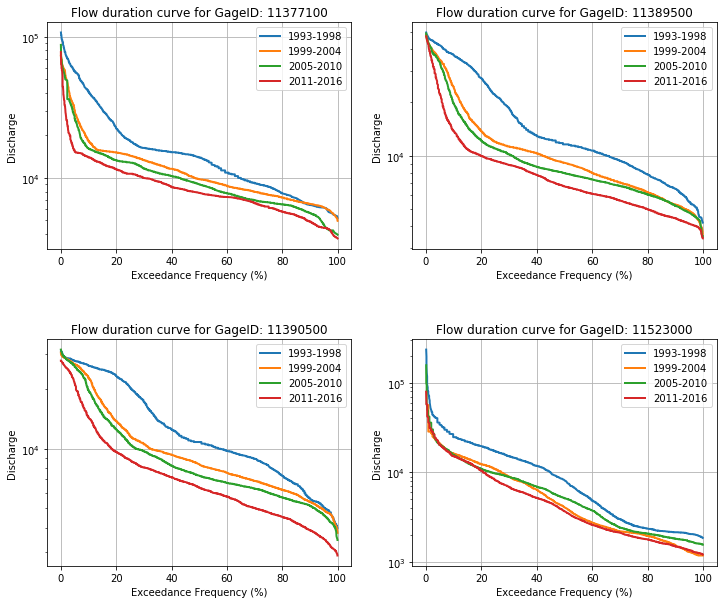

In [8]:
periods = {0:{'start':'1993-01-01','end':'1998-12-31'},
           1:{'start':'1999-01-01','end':'2004-12-31'},
           2:{'start':'2005-01-01','end':'2010-12-31'},
           3:{'start':'2011-01-01','end':'2016-12-31'}
}

fig , axes = plt.subplots(nrows=2, ncols=2,figsize=(12,10))
axs = axes.flatten()
for site in range(len(sites)):
    data_site = df[sites[site]]
    ax = axs[site]
    for period in range(len(periods)):
        mask = (dateRange >= periods[period]['start']) & (dateRange <= periods[period]['end'])
        prob, data = fdc(data_site.loc[mask])
        ax.plot(prob,data,linewidth=2)
    ax.set_yscale('log')
    ax.grid()
    ax.set(xlabel='Exceedance Frequency (%)', ylabel='Discharge')
    ax.set(title='Flow duration curve for GageID: ' + sites[site])
    ax.legend(['1993-1998', '1999-2004', '2005-2010', '2011-2016'])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)